In [56]:
pip install pandas scikit-learn

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
data = {
    'Student': ['Sumit', 'rahul', 'Saleem', 'ravi', 'roy', 
                'sunita', 'robin', 'ali', 'ramesh', 'franklin'],
    'Grades': [85, 70, 90, 65, 80, 75, 95, 60, 88, 78],
    'Skills': [8, 6, 9, 5, 7, 6, 10, 4, 8, 7],
    'internships':[5,2,3,4,1,7,2,8,1,3],
    'projects':[2,1,2,3,4,2,4,3,4,1],
    'Experience': [1, 0, 2, 0, 1, 1, 2, 0, 1, 1],
    'Placed': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
    
}

df = pd.DataFrame(data)

In [66]:
X = df[['Grades', 'Skills','internships','projects', 'Experience']]
y = df['Placed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [69]:
df['Prediction'] = model.predict(X)
print(df[['Student', 'Grades', 'Skills','internships','projects', 'Experience', 'Prediction']])

    Student  Grades  Skills  internships  projects  Experience  Prediction
0     Sumit      85       8            5         2           1           1
1     rahul      70       6            2         1           0           0
2    Saleem      90       9            3         2           2           1
3      ravi      65       5            4         3           0           0
4       roy      80       7            1         4           1           1
5    sunita      75       6            7         2           1           0
6     robin      95      10            2         4           2           1
7       ali      60       4            8         3           0           0
8    ramesh      88       8            1         4           1           1
9  franklin      78       7            3         1           1           1


In [70]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

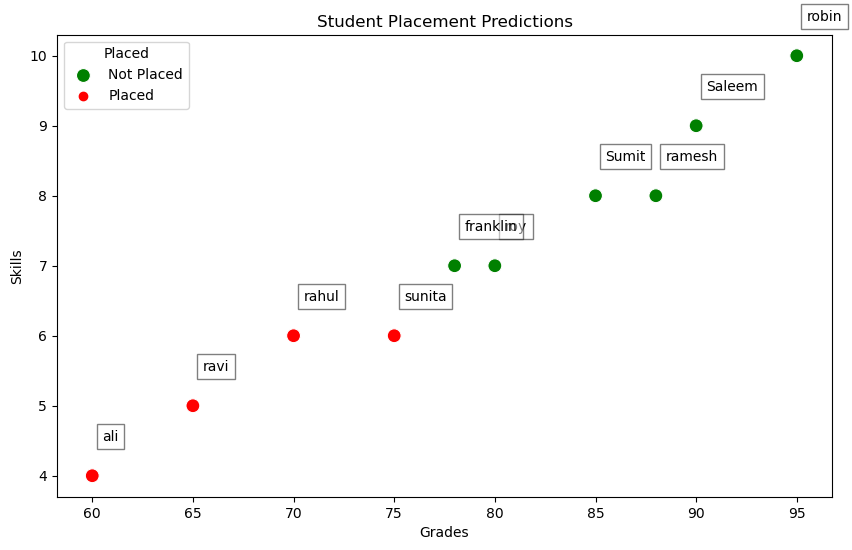

In [51]:
# Define colors for the predictions
colors = ['green' if placed == 1 else 'red' for placed in df['Prediction']]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Grades', y='Skills', hue='Prediction', palette={1: 'green', 0: 'red'}, data=df, s=100)

# Annotate each point with the student's name
for i in range(df.shape[0]):
    plt.text(x=df['Grades'][i] + 0.5, y=df['Skills'][i] + 0.5, s=df['Student'][i], 
             fontdict=dict(color='black', size=10), bbox=dict(facecolor='white', alpha=0.5))

plt.title('Student Placement Predictions')
plt.xlabel('Grades')
plt.ylabel('Skills')
plt.legend(title='Placed', loc='upper left', labels=['Not Placed', 'Placed'])
plt.show()

In [52]:
total_students = len(df)
placed_students = df['Prediction'].sum()
not_placed_students = total_students - placed_students

placed_percentage = (placed_students / total_students) * 100
not_placed_percentage = (not_placed_students / total_students) * 100

print(f'Placed: {placed_percentage:.2f}%')
print(f'Not Placed: {not_placed_percentage:.2f}%')

Placed: 60.00%
Not Placed: 40.00%


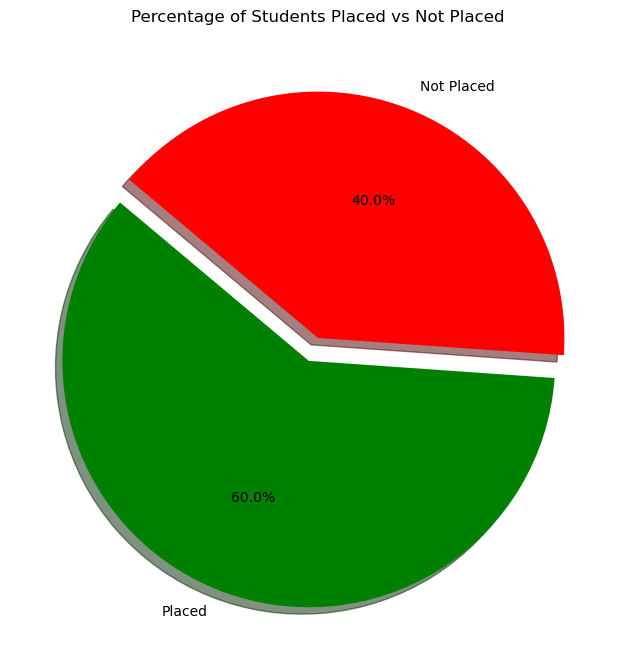

In [53]:
# Data for the pie chart
labels = ['Placed', 'Not Placed']
sizes = [placed_percentage, not_placed_percentage]
colors = ['green', 'red']
explode = (0.1, 0)  # explode the 1st slice (Placed)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Students Placed vs Not Placed')
plt.show()

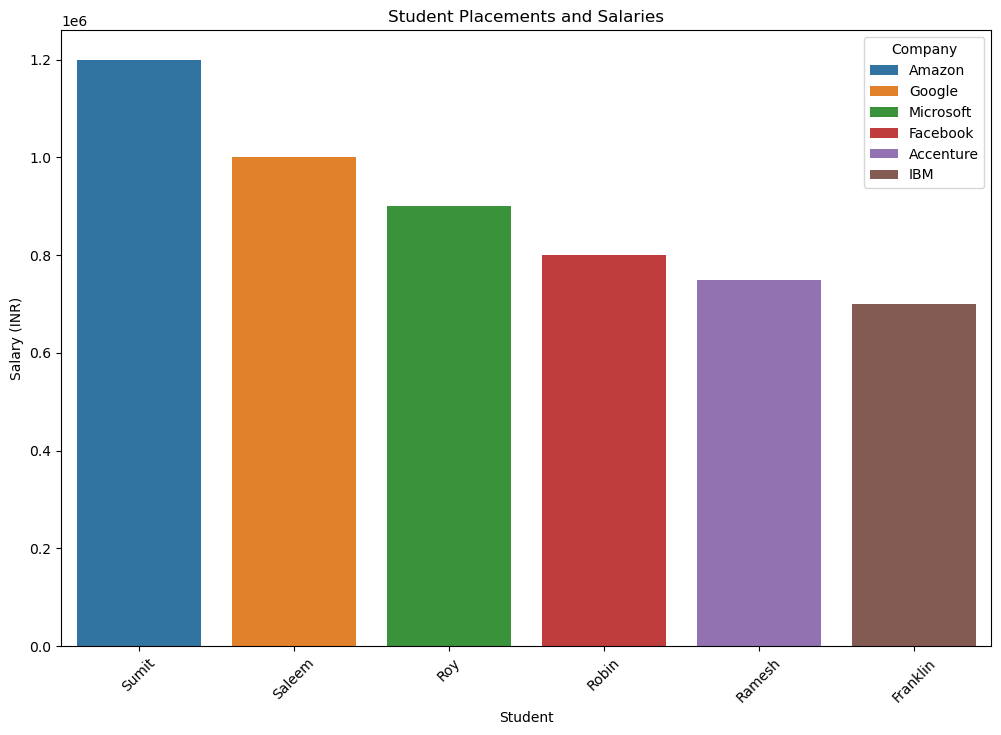

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Student': ['Sumit', 'Saleem', 'Roy', 
                 'Robin', 'Ramesh', 'Franklin'],
    'Company': ['Amazon', 'Google', 'Microsoft', 'Facebook', 'Accenture', 
                'IBM'],
    'Salary': [1200000, 1000000, 900000, 800000, 750000, 
               700000]
}

df = pd.DataFrame(data)

# Sort data by Salary
df_sorted = df.sort_values(by='Salary', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Student', y='Salary', hue='Company', data=df_sorted, dodge=False)
plt.title('Student Placements and Salaries')
plt.xlabel('Student')
plt.ylabel('Salary (INR)')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()